In [1]:
from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pre = Preprocessing('fer2013')
train = pre.load_data(filename='DatasetAA.csv.gz', name='train')

#### I have a very little amount of samples of class 1:Disgust,  I am going to increase that number by rotating and flipping horizontal

In [4]:
disgust = train.loc[train['emotion'] == 1]
disgust.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
299,-0.011765,-0.011765,0.011765,-0.058824,-0.137255,0.317647,0.364706,0.349020,0.356863,0.364706,...,0.019608,-0.168627,-0.333333,-0.396078,-0.443137,-0.529412,-0.160784,0.560784,0.631373,1
388,-0.301961,-0.568627,-0.811765,-0.686275,-0.662745,-0.623529,-0.584314,-0.568627,-0.537255,-0.678431,...,-0.223529,-0.137255,-0.043137,-0.215686,-0.466667,-0.725490,-0.819608,-0.819608,-0.858824,1
416,0.600000,0.529412,0.419608,0.027451,-0.607843,-0.607843,-0.552941,-0.560784,-0.482353,-0.231373,...,-0.074510,-0.105882,-0.129412,-0.058824,0.090196,0.121569,0.176471,0.223529,0.262745,1
473,-0.890196,-0.913725,-0.898039,-0.905882,-0.678431,-0.254902,-0.113725,-0.121569,-0.129412,-0.043137,...,-0.450980,-0.592157,-0.756863,-0.819608,-0.725490,-0.647059,-0.647059,-0.639216,-0.623529,1
533,-0.858824,-0.803922,-0.615686,-0.411765,-0.301961,-0.239216,-0.215686,-0.215686,-0.207843,-0.192157,...,0.286275,0.294118,0.309804,0.317647,0.317647,0.278431,0.239216,-0.341176,-0.890196,1


In [5]:
len(disgust)

436

In [6]:
from image_utils import ImageConverter
import matplotlib.pyplot as plt

In [7]:
img_conv = ImageConverter()

In [8]:
train_only_disgust_np = disgust.drop(columns = ['emotion']).values

In [9]:
array_0 = train_only_disgust_np[0]
array_0_frame = img_conv.reshape_array_to_frame(array_0)
array_0_frame_flipped = img_conv.rotate_image(array_0_frame, 20)

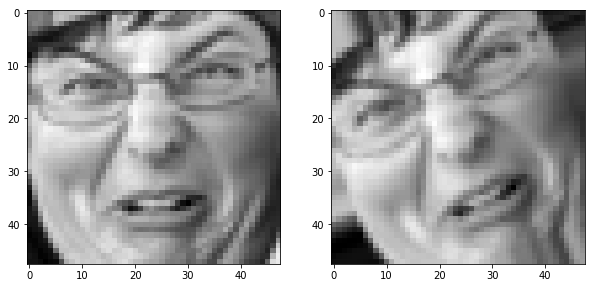

In [10]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_0_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_0_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [11]:
array_50 = train_only_disgust_np[50]
array_50_frame = img_conv.reshape_array_to_frame(array_50)
array_50_frame_flipped = img_conv.rotate_image(array_50_frame, 20)

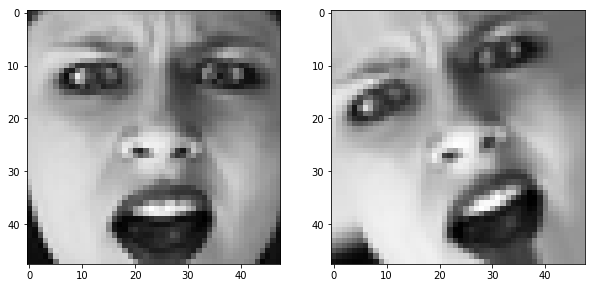

In [12]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_50_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_50_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [13]:
rotated_10_train_only_disgust = np.zeros(shape=train_only_disgust_np.shape)
rotated_20_train_only_disgust = np.zeros(shape=train_only_disgust_np.shape)
idx = 0
for i in range(len(train_only_disgust_np)):
    array = train_only_disgust_np[i]
    frame = img_conv.reshape_array_to_frame(array)
    
    rot_10 = img_conv.rotate_image(frame, 10)
    array_rot_10 = img_conv.reshape_frame_to_array(rot_10)
    rotated_10_train_only_disgust[i] = array_rot_10  
    
    rot_20 = img_conv.rotate_image(frame, 20)
    array_rot_20 = img_conv.reshape_frame_to_array(rot_20)
    rotated_20_train_only_disgust[i] = array_rot_20
    
    ##rot_15 = img_conv.rotate_image(img_conv.reshape_array_to_frame(train_only_disgust_np[i]), 15)
    #rotated_train_only_disgust[i] = img_conv.reshape_frame_to_array(rot_5)
    #rotated_train_only_disgust[idx + 1] = img_conv.reshape_frame_to_array(rot_15)

In [14]:
len(rotated_10_train_only_disgust)

436

In [15]:
len(rotated_20_train_only_disgust)

436

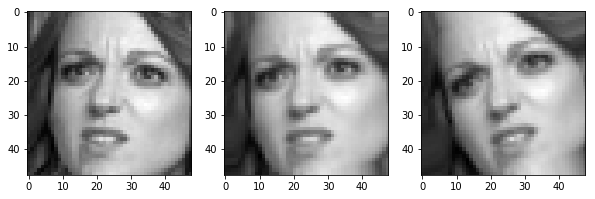

In [16]:
img_idx = 170
plt.figure(1, figsize=(10, 5))
plt.subplot(1,3, 1)
plt.imshow(img_conv.reshape_array_to_frame(train_only_disgust_np[img_idx]), cmap='gray', interpolation='none')
plt.subplot(1,3, 2)
plt.imshow(img_conv.reshape_array_to_frame(rotated_10_train_only_disgust[img_idx]), cmap='gray', interpolation='none')
plt.subplot(1,3, 3)
plt.imshow(img_conv.reshape_array_to_frame(rotated_20_train_only_disgust[img_idx]), cmap='gray', interpolation='none')
plt.show()

In [17]:
#Seems to work, going to save the data

In [18]:
rot_disgust_10_df = pd.DataFrame(rotated_10_train_only_disgust)
rot_disgust_10_df['emotion'] = 1
rot_disgust_10_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
431,-0.738235,-0.711275,-0.682353,-0.419853,0.075490,0.549020,0.755147,0.817157,0.829902,0.837745,...,-0.666176,-0.714461,-0.759069,-0.792157,-0.843137,-0.866667,-0.848039,-0.764706,-0.745098,1
432,-0.364706,-0.368137,-0.375735,-0.383578,-0.391176,-0.393137,-0.382843,-0.367157,-0.349510,-0.328431,...,-0.078922,-0.097549,-0.165196,-0.216667,-0.221569,-0.141176,-0.099510,-0.105882,-0.123529,1
433,0.624020,0.722059,0.736765,0.777451,0.801961,0.814706,0.814216,0.790441,0.762255,0.744608,...,0.543627,0.540196,0.441912,0.307843,-0.117647,-0.732353,-0.981373,-0.986275,-1.000000,1
434,-0.667647,-0.599510,-0.559069,-0.541912,-0.516667,-0.461765,-0.397794,-0.316912,-0.268137,-0.270098,...,-0.568627,-0.573775,-0.576471,-0.571569,-0.568627,-0.568627,-0.573284,-0.576471,-0.576471,1
435,0.024020,-0.234804,-0.421814,-0.335784,0.075490,0.462745,0.590441,0.641667,0.628922,0.621078,...,0.593627,0.555882,0.524510,0.469608,0.359804,0.184069,-0.023039,-0.172059,-0.263235,1


In [19]:
rot_disgust_20_df = pd.DataFrame(rotated_20_train_only_disgust)
rot_disgust_20_df['emotion'] = 1
rot_disgust_20_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
431,0.575490,0.760539,0.817157,0.829657,0.837010,0.844363,0.848039,0.819363,0.812010,0.818873,...,-0.376471,-0.494118,-0.554902,-0.593873,-0.630637,-0.667402,-0.714461,-0.756618,-0.789216,1
432,-0.392402,-0.381863,-0.367157,-0.350245,-0.329902,-0.313971,-0.291176,-0.262010,-0.239951,-0.239216,...,-0.127941,-0.083824,-0.089461,-0.129902,-0.112745,-0.077696,-0.097549,-0.160294,-0.212990,1
433,0.815441,0.813235,0.790441,0.762500,0.748284,0.710294,0.669853,0.662010,0.639951,0.632108,...,0.662500,0.655147,0.626471,0.537500,0.509314,0.545343,0.540196,0.450245,0.321078,1
434,-0.456618,-0.392402,-0.316912,-0.268382,-0.267892,-0.289951,-0.311275,-0.326961,-0.371078,-0.393873,...,-0.537990,-0.560049,-0.560784,-0.560784,-0.566912,-0.568627,-0.573775,-0.576471,-0.572304,1
435,0.477451,0.595833,0.641667,0.629167,0.621814,0.615686,0.617157,0.632843,0.676961,0.671324,...,0.647304,0.654657,0.654902,0.654902,0.636520,0.591912,0.555882,0.526471,0.476225,1


In [20]:
rot_disgust_df = pd.concat([rot_disgust_10_df, rot_disgust_20_df])

In [21]:
rot_disgust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 435
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 15.3 MB


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 504.9 MB


In [23]:
#the rotated dataset and the train seems to match

In [24]:
rot_disgust_df.columns = train.columns 

In [25]:
train_expanded_disgust_rot = pd.concat([train, rot_disgust_df], axis = 0)

In [26]:
train_expanded_disgust_rot = train_expanded_disgust_rot.reset_index().drop(columns = ['index'])

In [27]:
train_expanded_disgust_rot.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
29576,0.575490,0.760539,0.817157,0.829657,0.837010,0.844363,0.848039,0.819363,0.812010,0.818873,...,-0.376471,-0.494118,-0.554902,-0.593873,-0.630637,-0.667402,-0.714461,-0.756618,-0.789216,1
29577,-0.392402,-0.381863,-0.367157,-0.350245,-0.329902,-0.313971,-0.291176,-0.262010,-0.239951,-0.239216,...,-0.127941,-0.083824,-0.089461,-0.129902,-0.112745,-0.077696,-0.097549,-0.160294,-0.212990,1
29578,0.815441,0.813235,0.790441,0.762500,0.748284,0.710294,0.669853,0.662010,0.639951,0.632108,...,0.662500,0.655147,0.626471,0.537500,0.509314,0.545343,0.540196,0.450245,0.321078,1
29579,-0.456618,-0.392402,-0.316912,-0.268382,-0.267892,-0.289951,-0.311275,-0.326961,-0.371078,-0.393873,...,-0.537990,-0.560049,-0.560784,-0.560784,-0.566912,-0.568627,-0.573775,-0.576471,-0.572304,1
29580,0.477451,0.595833,0.641667,0.629167,0.621814,0.615686,0.617157,0.632843,0.676961,0.671324,...,0.647304,0.654657,0.654902,0.654902,0.636520,0.591912,0.555882,0.526471,0.476225,1


In [28]:
# I have now the data with rotated disgust images, my next step is to flip ALL OF IT

In [29]:
train_np = train_expanded_disgust_rot.drop(columns = ['emotion']).values

In [30]:
flipped_train_np = np.zeros(shape=train_np.shape)
for i in range(len(train_np)):
    flipped_np = img_conv.flip_frame_horitzontally(img_conv.reshape_array_to_frame(train_np[i]))
    flipped_train_np[i] = img_conv.reshape_frame_to_array(flipped_np)

In [31]:
flipped_train_np

array([[-0.67843137, -0.6627451 , -0.59215686, ..., -0.34117647,
        -0.43529412, -0.39607843],
       [-0.05882353,  0.09803922,  0.01176471, ...,  0.45098039,
         0.44313725,  0.45882353],
       [-0.8745098 , -0.78823529, -0.65490196, ...,  0.96078431,
         0.96862745,  0.96078431],
       ...,
       [ 0.07916667,  0.17352941,  0.19411765, ..., -0.98431373,
        -0.98529412, -0.9879902 ],
       [-0.90906863, -0.90098039, -0.89117647, ..., -0.09754902,
        -0.01470588, -0.02279412],
       [-0.0870098 , -0.09509804, -0.09803922, ...,  1.        ,
         1.        ,  1.        ]])

In [32]:
new_train = pd.DataFrame(flipped_train_np)
new_train['emotion'] = train_expanded_disgust_rot['emotion']
new_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
29576,-0.248529,-0.178431,-0.135784,-0.108824,-0.081863,-0.092157,-0.116422,-0.140686,-0.137837,-0.048407,...,0.307292,0.390686,0.490441,0.590196,0.665686,0.676471,0.687255,0.694118,0.694118,1
29577,0.045343,0.026471,-0.004412,-0.042157,-0.079902,-0.111765,-0.141422,-0.171078,0.091782,0.189798,...,0.354450,0.347059,0.293137,0.239216,0.208088,0.237745,0.267402,0.296078,0.323039,1
29578,0.079167,0.173529,0.194118,0.172549,0.150980,0.143137,0.140441,0.137745,-0.050123,-0.646109,...,-1.000000,-0.999020,-0.993627,-0.988235,-0.984314,-0.984314,-0.984314,-0.985294,-0.987990,1
29579,-0.909069,-0.900980,-0.891176,-0.880392,-0.869608,-0.868627,-0.871324,-0.874020,-0.865196,-0.864246,...,-0.125498,-0.389216,-0.394608,-0.400000,-0.367157,-0.232353,-0.097549,-0.014706,-0.022794,1
29580,-0.087010,-0.095098,-0.098039,-0.098039,-0.098039,-0.072549,-0.037500,-0.002451,-0.063649,-0.056189,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


In [33]:
new_train.columns = train_expanded_disgust_rot.columns 

In [34]:
train_expanded = pd.concat([train_expanded_disgust_rot, new_train], axis = 0)

In [35]:
train_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59162 entries, 0 to 29580
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 1.0 GB


In [36]:
pre.set(name='DatasetDD', value=train_expanded)

In [37]:
#Chack the structure of the new training dataset

In [38]:
X_df = train_expanded.drop(columns=['emotion'])
y_df = train_expanded['emotion']

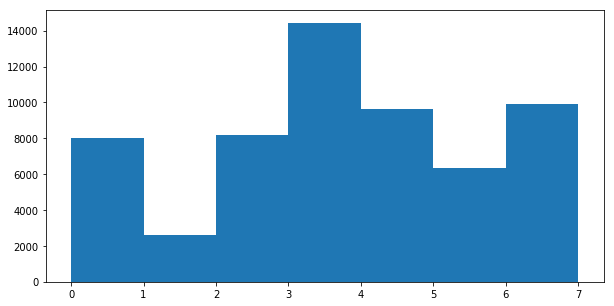

In [39]:
plt.figure(1, figsize=(10, 5))
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.show()

In [40]:
pre.save(name= 'DatasetDD')

In [16]:
#compare the new with the old one

In [46]:
pre.load_data(filename='train_norm.csv', name='train_norm')

X_df_old = pre.get(name='train_norm').drop(columns=['emotion'])
y_df_old= pre.get(name='train_norm')['emotion']

In [49]:
pre.load_data(filename='train_expanded_disgust.csv', name='train_expanded_disgust')

X_df_exp_c1 = pre.get(name='train_expanded_disgust').drop(columns=['emotion'])
y_df_exp_c1 = pre.get(name='train_expanded_disgust')['emotion']

In [48]:
pre.load_data(filename='train_expanded.csv', name='train_expanded')

X_df_exp = pre.get(name='train_expanded').drop(columns=['emotion'])
y_df_exp = pre.get(name='train_expanded')['emotion']

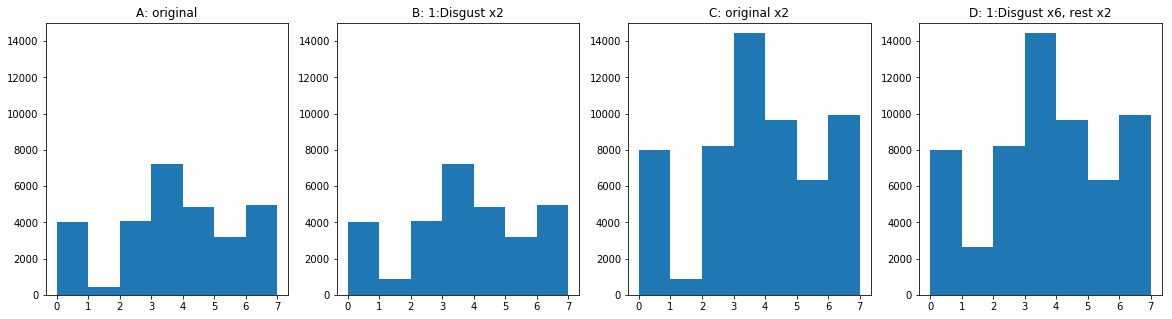

In [69]:
plt.figure(1, figsize=(20, 5))
plt.subplot(1,4, 1)
plt.hist(y_df_old.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('A: original')
plt.subplot(1,4, 2)
plt.hist(y_df_exp_c1.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('B: 1:Disgust x2')
plt.subplot(1,4, 3)
plt.hist(y_df_exp.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('C: original x2')
plt.subplot(1,4, 4)
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('D: 1:Disgust x6, rest x2')
plt.show()